## Introduction

# Project: Communicate Data Findings

This project has two parts that demonstrate the importance and value of data visualization techniques in the data analysis process.

Part I, Exploratory data visualization

Part II: Explantory Data visualization. 
    
# Dataset : Prosper Loan Dataset
    
The Prosper loan dataset comprises of 113937 loan entries with 81 attributes on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others, from the year 2009-2014. There are two main categories in this dataset:

Borrower information: Basic attributes of the borrowers such as annual income, condition of employment, interest rate, loan status, etc.
Loan performance information: Metrics evaluating the risk associated with the loans such as Prosper score and bank card utilization, etc.

In [1]:
# import all libraries and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Wrangling

In [2]:
# load in the dataset given
loan = pd.read_csv("prosperLoanData.csv")

In [4]:
loan.shape

(113937, 81)

In [5]:
loan.head(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.0,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,0.0796,0.0249,0.0547,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.275,0.240,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.0,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41


In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

# Data Assessing and Cleaning 



# Assessment

A few elements will need to be fixed in order to make our analysis possible and more insightful.

We are going to define which variables and dimensions will be useful for our analysis. Since we have a fairly big data frame (81 columns), we want to narrow down its size in order to answer some questions.  From priliminary research, our columns of interests are:

feature_cols = ['ProsperScore', 'ListingCategory (numeric)', 'ListingCategory', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentCreditLines', 'OpenRevolvingAccounts', 'DebtToIncomeRatio', 'IncomeVerifiable','IncomeRange' ,'LoanOriginalAmount', 'LoanStatus', 'IncomeMean', 'IncomeRange']

Quality:

Alot of missing values that will ne to be treated

Changing data types for some columns to suit our needs

Adding new columns and data to create more inside 

Changing the ListingCreation format

Tidy:

Listing Categories, despite being categorical, are in a numeric format. We will want to change this and switch it to string format with the whole category titles spelt out

Adding a column of WageIncome per month: High, Medium, Low, it might be handy to have a categorical variable instead of the numeric one

## Cleaning

In [3]:
# our target columns 
feature_cols = ['ListingNumber','ListingCreationDate','ProsperRating (Alpha)','ProsperScore',\
            'ListingCategory (numeric)', 'Occupation','EmploymentStatus', \
            'IsBorrowerHomeowner', 'CurrentCreditLines', 'OpenRevolvingAccounts', 'DebtToIncomeRatio', \
            'IncomeVerifiable', 'LoanOriginalAmount', 'LoanStatus', \
            'CreditScoreRangeLower', 'CreditScoreRangeUpper','BorrowerState', \
            'LoanOriginationDate', 'IncomeRange','BorrowerAPR','BorrowerRate','StatedMonthlyIncome','Term']

In [4]:
# New subdataset
df =loan[feature_cols]
df.head()

,ListingNumber,ListingCreationDate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),Occupation,EmploymentStatus,IsBorrowerHomeowner,CurrentCreditLines,OpenRevolvingAccounts,DebtToIncomeRatio,IncomeVerifiable,LoanOriginalAmount,LoanStatus,CreditScoreRangeLower,CreditScoreRangeUpper,BorrowerState,LoanOriginationDate,IncomeRange,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,Term
0,193129,2007-08-26 19:09:29.263000000,NaN,NaN,0,Other,Self-employed,True,5.0,1,0.17,True,9425,Completed,640.0,659.0,CO,2007-09-12 00:00:00,"$25,000-49,999",0.16516,0.1580,3083.333333,36
1,1209647,2014-02-27 08:28:07.900000000,A,7.0,2,Professional,Employed,False,14.0,13,0.18,True,10000,Current,680.0,699.0,CO,2014-03-03 00:00:00,"$50,000-74,999",0.12016,0.0920,6125.000000,36
2,81716,2007-01-05 15:00:47.090000000,NaN,NaN,0,Other,Not available,False,NaN,0,0.06,True,3001,Completed,480.0,499.0,GA,2007-01-17 00:00:00,Not displayed,0.28269,0.2750,2083.333333,36
3,658116,2012-10-22 11:02:35.010000000,A,9.0,16,Skilled Labor,Employed,True,5.0,7,0.15,True,10000,Current,800.0,819.0,GA,2012-11-01 00:00:00,"$25,000-49,999",0.12528,0.0974,2875.000000,36
4,909464,2013-09-14 18:38:39.097000000,D,4.0,2,Executive,Employed,True,19.0,6,0.26,True,15000,Current,680.0,699.0,MN,2013-09-20 00:00:00,"$100,000+",0.24614,0.2085,9583.333333,36


In [9]:
#Checking Null values
df.isnull().sum()

ListingNumber                    0
ListingCreationDate              0
ProsperRating (Alpha)        29084
ProsperScore                 29084
ListingCategory (numeric)        0
Occupation                    3588
EmploymentStatus              2255
IsBorrowerHomeowner              0
CurrentCreditLines            7604
OpenRevolvingAccounts            0
DebtToIncomeRatio             8554
IncomeVerifiable                 0
LoanOriginalAmount               0
LoanStatus                       0
CreditScoreRangeLower          591
CreditScoreRangeUpper          591
BorrowerState                 5515
LoanOriginationDate              0
IncomeRange                      0
BorrowerAPR                     25
BorrowerRate                     0
StatedMonthlyIncome              0
Term                             0
dtype: int64

 ProsperRating is the most important feature of this dataset since it determines weather a loan will be given to you or not, so we interested in only non null values

In [5]:
df=df[df['ProsperRating (Alpha)'].notnull()]

In [6]:
# Filling missing values with mean
df['DebtToIncomeRatio']=df['DebtToIncomeRatio'].fillna(df['DebtToIncomeRatio'].mean())

In [7]:
# Filling missing values 
df['Occupation']=df['Occupation'].fillna('Unknown')

In [8]:
 #Convert 'ListingCreationDate' type from str to datetime 
df['ListingCreationDate']=pd.to_datetime(df['ListingCreationDate'])

# Extract date information from ListingCreationDate column
df['date'] = df['ListingCreationDate'].dt.date

# Extract year information from ListingCreationDate column
df['year']= df['ListingCreationDate'].dt.year

# Extract month information from ListingCreationDate column
df['month'] = df['ListingCreationDate'].dt.month

# Convert 'date' type from str to datetime 
df['date']=pd.to_datetime(df['date'])
# df_selected['year']=pd.to_datetime(df_selected['year'])

# Drop unused column
df.drop(['ListingCreationDate'], axis=1, inplace=True)

In [9]:
df.month.unique()

array([ 2, 10,  9, 12,  4,  5,  7,  8, 11,  1,  6,  3])

In [10]:
# Convert 'Month' type  to str
df['month']=df['month'].astype(str)
# replacing numerical values of month with month names
df.month=df.month.replace([ '1', '2','3','4','5','6','7','8', '9','10','11','12'], ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])



In [20]:
df.month.unique()

array(['Feb', 'Oct', 'Sept', 'Dec', 'Apr', 'May', 'Jul', 'Aug', 'Nov',
       'Jan', 'Jun', 'Mar'], dtype=object)

In [11]:
# Convert 'LoanOriginationDate' type from str to datetime 
df['LoanOriginationDate']=pd.to_datetime(df['LoanOriginationDate'])
df['ListingNumber']=df['ListingNumber'].astype(str)
df['ProsperScore']=df['ProsperScore'].astype(int)

In [13]:
list_dict = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
             4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 
             9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
             13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle',
             17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

df['ListingCategory'] = df['ListingCategory (numeric)'].map(list_dict)

In [14]:
df.drop(['ListingCategory (numeric)'], axis=1, inplace=True)

In [16]:
# convert string to ordinal category type
ordinal_rating = ['AA', 'A', 'B', 'C', 'D', 'E','HR']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
df['ProsperRating'] = df['ProsperRating (Alpha)'].astype(ordered_var)

In [17]:
# calcute averge Credit Score Range
df['CreditScore_average'] = (df['CreditScoreRangeLower'] + df['CreditScoreRangeUpper'])/2

In [18]:
def classify(row):
    if row["StatedMonthlyIncome"]<2500:
        return 'Lower Class'
    if row["StatedMonthlyIncome"]<8000:
        return 'Meddle Class '
    else:
        return 'High Class'

In [19]:
df['IncomeGroup'] = df.apply(classify, axis=1)
df.sample(3)

,ListingNumber,ProsperRating (Alpha),ProsperScore,Occupation,EmploymentStatus,IsBorrowerHomeowner,CurrentCreditLines,OpenRevolvingAccounts,DebtToIncomeRatio,IncomeVerifiable,LoanOriginalAmount,LoanStatus,CreditScoreRangeLower,CreditScoreRangeUpper,BorrowerState,LoanOriginationDate,IncomeRange,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,Term,date,year,month,ListingCategory,ProsperRating,CreditScore_average,IncomeGroup
32138,831978,C,3,Other,Employed,True,11.0,9,0.38,True,10000,Completed,700.0,719.0,TX,2013-07-12,"$25,000-49,999",0.22693,0.2024,3523.416667,60,2013-07-09,2013,Jul,Debt Consolidation,C,709.5,Meddle Class
39276,889539,E,4,Skilled Labor,Employed,False,5.0,4,0.15,True,8500,Current,660.0,679.0,MA,2013-09-24,"$50,000-74,999",0.30337,0.2769,5166.666667,60,2013-09-06,2013,Sept,Debt Consolidation,E,669.5,Meddle Class
81203,487790,E,5,Sales - Retail,Employed,True,9.0,5,0.16,True,3000,Completed,660.0,679.0,MI,2010-12-21,"$50,000-74,999",0.35858,0.3220,5166.666667,36,2010-12-13,2010,Dec,Home Improvement,E,669.5,Meddle Class


In [34]:
df.corr()

,ProsperScore,IsBorrowerHomeowner,CurrentCreditLines,OpenRevolvingAccounts,DebtToIncomeRatio,IncomeVerifiable,LoanOriginalAmount,CreditScoreRangeLower,CreditScoreRangeUpper,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,Term,year,CreditScore_average
ProsperScore,1.000000,0.064438,-0.008497,0.030017,-0.138120,0.154619,0.266293,0.369603,0.369603,-0.668287,-0.649736,0.083757,0.028947,-0.172796,0.369603
IsBorrowerHomeowner,0.064438,1.000000,0.255658,0.148019,-0.012365,0.090556,0.177856,0.276917,0.276917,-0.134957,-0.126180,0.120302,0.076061,0.009453,0.276917
CurrentCreditLines,-0.008497,0.255658,1.000000,0.845936,0.140149,0.050375,0.192962,0.093353,0.093353,-0.109599,-0.107962,0.127176,0.071281,0.136185,0.093353
OpenRevolvingAccounts,0.030017,0.148019,0.845936,1.000000,0.116381,0.019148,0.208124,0.101072,0.101072,-0.139307,-0.139085,0.085662,0.064188,0.165808,0.101072
DebtToIncomeRatio,-0.138120,-0.012365,0.140149,0.116381,1.000000,-0.001750,-0.017353,-0.013124,-0.013124,0.121994,0.119685,-0.083078,0.000089,0.023742,-0.013124
IncomeVerifiable,0.154619,0.090556,0.050375,0.019148,-0.001750,1.000000,0.096156,-0.026692,-0.026692,-0.119105,-0.113667,0.012347,0.066396,0.062249,-0.026692
LoanOriginalAmount,0.266293,0.177856,0.192962,0.208124,-0.017353,0.096156,1.000000,0.277918,0.277918,-0.426361,-0.413466,0.182870,0.339117,0.342672,0.277918
CreditScoreRangeLower,0.369603,0.276917,0.093353,0.101072,-0.013124,-0.026692,0.277918,1.000000,1.000000,-0.525888,-0.508681,0.067757,0.050316,-0.054098,1.000000
CreditScoreRangeUpper,0.369603,0.276917,0.093353,0.101072,-0.013124,-0.026692,0.277918,1.000000,1.000000,-0.525888,-0.508681,0.067757,0.050316,-0.054098,1.000000
BorrowerAPR,-0.668287,-0.134957,-0.109599,-0.139307,0.121994,-0.119105,-0.426361,-0.525888,-0.525888,1.000000,0.993333,-0.093926,-0.068132,-0.238824,-0.525888


In [35]:
df.describe()

,ProsperScore,CurrentCreditLines,OpenRevolvingAccounts,DebtToIncomeRatio,LoanOriginalAmount,CreditScoreRangeLower,CreditScoreRangeUpper,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,Term,year,CreditScore_average
count,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,8.485300e+04,84853.000000,84853.000000,84853.000000
mean,5.950067,10.508032,7.386292,0.258752,9083.440515,699.390240,718.390240,0.226658,0.196022,5.931175e+03,42.486135,2012.328156,708.890240
std,2.376501,5.317401,4.515977,0.304333,6287.860058,47.095937,47.095937,0.079916,0.074631,8.239944e+03,11.640346,1.200926,47.095937
min,1.000000,0.000000,0.000000,0.000000,1000.000000,600.000000,619.000000,0.045830,0.040000,0.000000e+00,12.000000,2009.000000,609.500000
25%,4.000000,7.000000,4.000000,0.160000,4000.000000,660.000000,679.000000,0.163280,0.135900,3.434000e+03,36.000000,2012.000000,669.500000
50%,6.000000,10.000000,7.000000,0.240000,7500.000000,700.000000,719.000000,0.219450,0.187500,5.000000e+03,36.000000,2013.000000,709.500000
75%,8.000000,13.000000,10.000000,0.310000,13500.000000,720.000000,739.000000,0.292540,0.257400,7.083333e+03,60.000000,2013.000000,729.500000
max,11.000000,59.000000,50.000000,10.010000,35000.000000,880.000000,899.000000,0.423950,0.360000,1.750003e+06,60.000000,2014.000000,889.500000


## Exploration and Visualization

# What is/are the main feature(s) of interest in your dataset?
ProsperScore affects interest rate, loan amount and many other variables in our data set.

I'm most interested in figuring out what features are best for predicting the prosper Score?

# What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect that employment status, isborrowerhomeowner, monthly income, debt to income ratio,  will have the strongest effects in predicting the prosper score.  

# Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: prosperscore


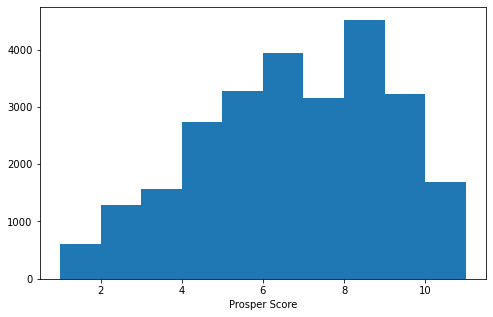

In [214]:
# start with a standard-scaled plot
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'ProsperScore' )
plt.xlabel('Prosper Score')
plt.show()

Prosper Score is left skewed with majority of the score values ranging from 4 to 10. The highest of these values being between 8 and 9.

Up next, lets look at our first predictor variable of interest: Eployment Status

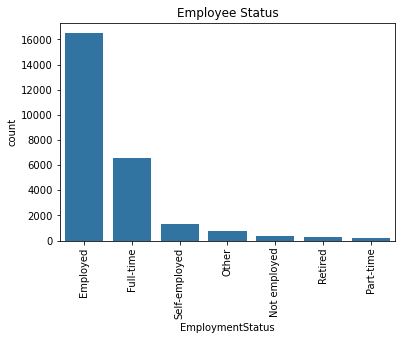

In [299]:
#plotting Employment status
base_color = sb.color_palette()[0]
order_score = df.EmploymentStatus.value_counts().index
sb.countplot(data=df, x = 'EmploymentStatus',  order = order_score, color = base_color);
plt.xticks(rotation = 90)
plt.title('Employee Status')
plt.show()

Majority of the borrowers are employed,  seconded  by part timeers while some full time. A few of them were self employed while very few were not employed. This could be justifying the left skwed of our prosper score distribution.

Up next, lets look at the next variable : occupation



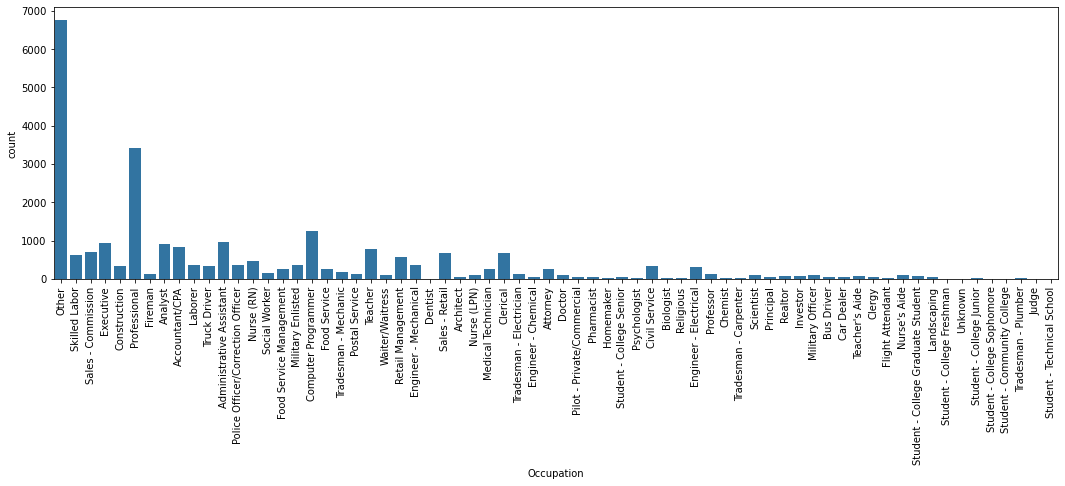

In [119]:
plt.figure(figsize = [18,5])
sb.countplot(data = df, x = 'Occupation', color = base_color);
plt.xticks(rotation = 90);

Majority of the borrowers are professionals, computer pogrammers, Administrative assitance and teachers. while he rest fall in many of the available occupation.

Next, we look at StatedMonthlyIncome variable



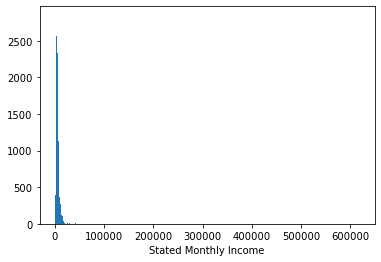

In [224]:
bins = np.arange(0, df['StatedMonthlyIncome'].max()+0.2, 0.2)
plt.hist(data=df, x='StatedMonthlyIncome', bins=1000);
plt.xlabel('Stated Monthly Income');


Since the graph is too compact, lets work on the  x limits so as to see the distribution better.

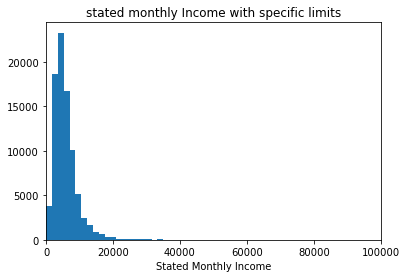

In [21]:
#Plotting statedmonthlyicome within specific limits
bins = np.arange(0, df['StatedMonthlyIncome'].max()+0.2, 0.2)
plt.hist(data=df, x='StatedMonthlyIncome', bins=1000);
plt.xlabel('Stated Monthly Income');
plt.title('stated monthly Income with specific limits')
plt.xlim((0,100000));


Stated Monthly Income variable is highy skwed to the right with majority of the borroers bring middle and low income earners

Next, we look at Debt to Income ratio



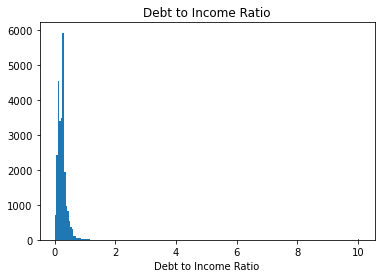

In [229]:
# Plot DebtToIncomeRatio
binsize = 0.05
bins = np.arange(0, df['DebtToIncomeRatio'].max()+binsize, binsize)
plt.hist(data = df, x = 'DebtToIncomeRatio', bins = bins)
plt.title('Debt to Income Ratio')
plt.xlabel('Debt to Income Ratio');
#plt.xlim(0,1);

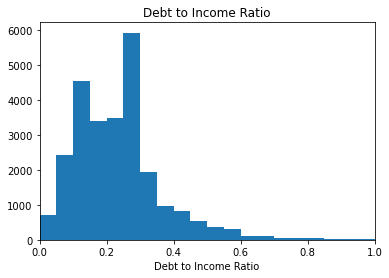

In [230]:
#limiing the scale to better view the graph.
binsize = 0.05
bins = np.arange(0, df['DebtToIncomeRatio'].max()+binsize, binsize)
plt.hist(data = df, x = 'DebtToIncomeRatio', bins = bins)
plt.title('Debt to Income Ratio')
plt.xlabel('Debt to Income Ratio');
plt.xlim(0,1);



 Lower DebtToIncomeRatio means a good balance between debt and income. It appears from the figure above that most borrowers who applied for a loan have a debt to income ratio around 30%.

Interestingly, the distribution of debt to income ratio is similar to that of stated monthly in come.


Next, we look at how the variable : Loan categories


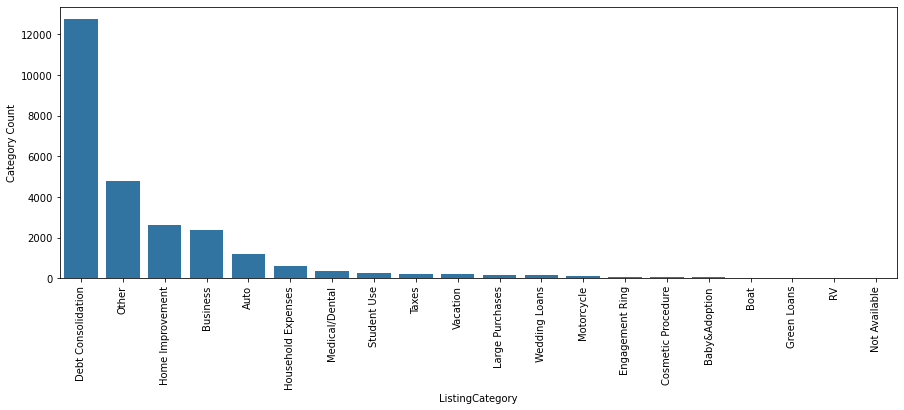

In [233]:
# plotting purpose of the loan 
plt.figure(figsize = [15,5])
categ_order = df['ListingCategory'].value_counts().index
sb.countplot(data = df, x = 'ListingCategory', color = base_color, order=categ_order)
plt.xticks(rotation= 90)
plt.ylabel('Category Count');

Debt consolidation  is the highest purpose for whcih people get to borrow money. Human Improvement, Business and some Personal loans are other notable categories in the loans by Listing Categories.

Up next, lets look at variable : Term



Up next, lets look at variable : Term

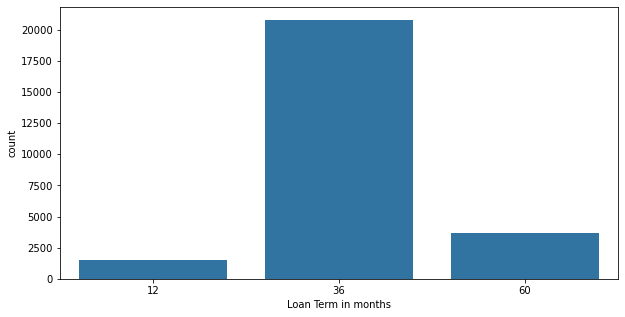

In [235]:
# Plot term of loans
plt.figure(figsize = [10,5])
sb.countplot(data=df, x='Term', color=base_color)
plt.xlabel('Loan Term in months');

We have short term loans for six month(One year), Middle term loans for 36 months (3 years) and long term loans for 60 months (five years). Long term loans are the highest followed by middle term loans. 

Lets conclude this part by looking at the last variable in our investigation : Income Group



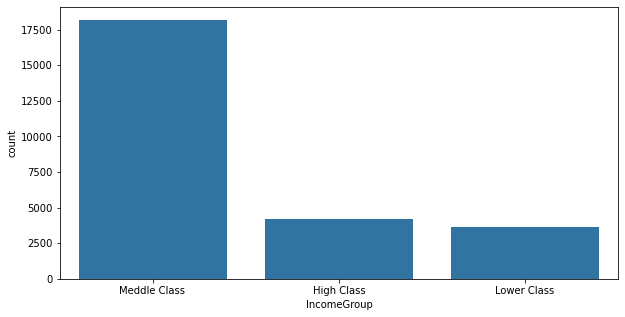

In [240]:
#grouping income earners into three groups to reflect a normal society
plt.figure(figsize = [10,5])
sb.countplot(data = df, x = 'IncomeGroup', color = base_color);

Majority of these borrowers are middle class.

# Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
The limits of the variable debtperincome ratio was adjusted so that we can have a better view ina our graph.

# Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Statedmonthly salary variable was regrouped to , lower, middle and high class to reflect a typical society.

# Bivariate Exploration

To start off with, lets look at the pairwise correlations present between features in the data.

In [256]:
numeric_vars = [  'ProsperScore', 
               'DebtToIncomeRatio', 'LoanOriginalAmount', 'StatedMonthlyIncome', 'BorrowerAPR','BorrowerRate']

We begin by looking at the correlation between numeric variables

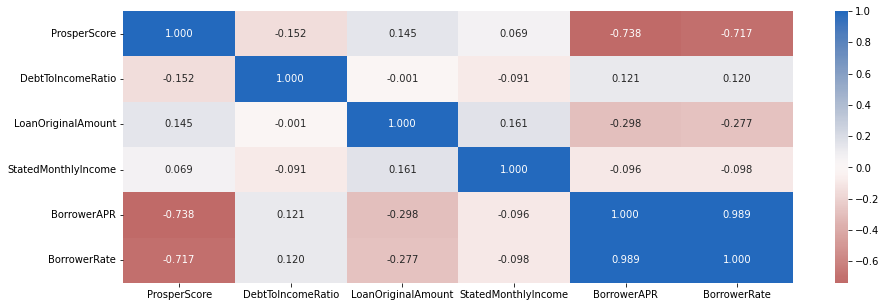

In [257]:
# correlation plot
plt.figure(figsize = [15, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

Loan df.shape= (26005, 33)
Loan df_samp.shape= (500, 33)


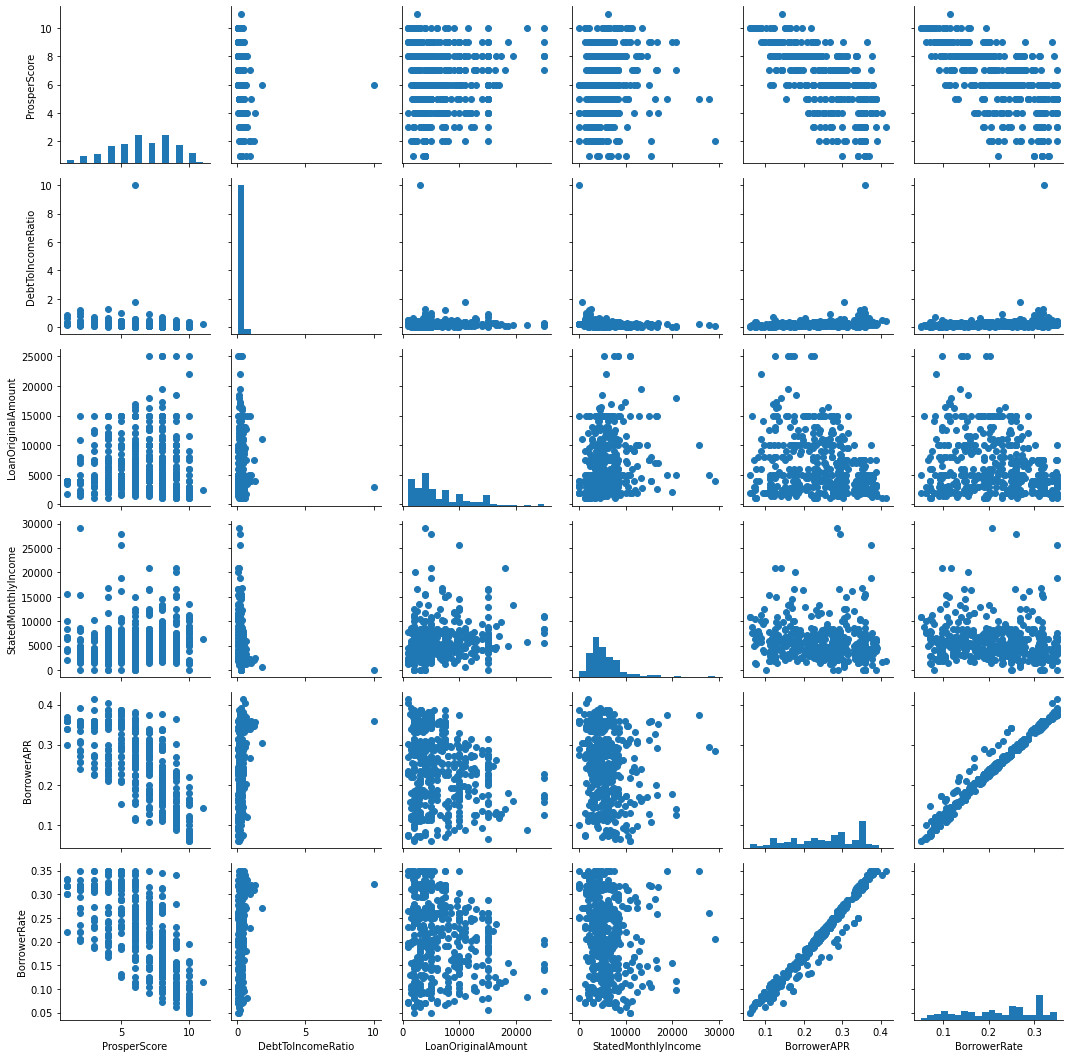

In [258]:
# plot matrix: sample 500 of our dataset so that plots are clearer and they render faster
print("Loan df.shape=",df.shape)
df_samp = df.sample(n=500, replace = False)
print("Loan df_samp.shape=",df_samp.shape)

g = sb.PairGrid(data = df_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

As sujested, prosperscore collerate possivetively with statedmonthly income which means, the higher your monthly income, the higher your prosper score , the higher your laon amount and the lesser the interest rate to be paid.

Prosperscore collerates negatuvely with debttoincomeratio. which means, the more debts you have to pay with your income, the lesser your prosper score and ofcourse, the lesser the amount of loan that can be given to you.

Hence Statedmonthlyincome and debettoincomeratio are strong determinant of the prosper score value.


Let's move on to looking at how prosper score  correlate with the categorical variables

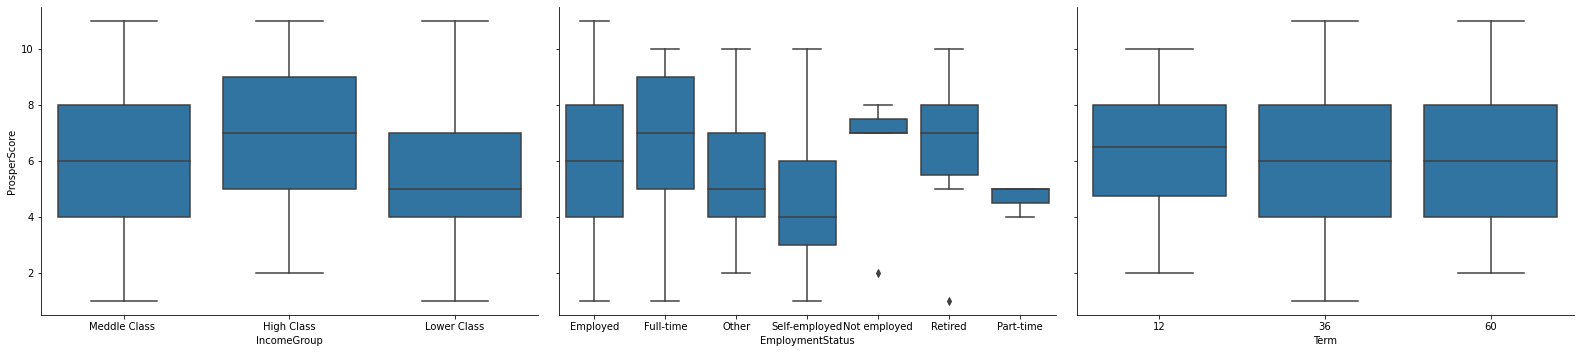

In [22]:
# Prosper Score against IncomeGroup, EmploymentStatus, and Term of Loan
df_samp = df.sample(n=1000, replace = False)
#Box plot function
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.rcParams["figure.figsize"] = (18,15)
g = sb.PairGrid(data = df_samp, y_vars = ['ProsperScore'], x_vars = ['IncomeGroup', 'EmploymentStatus', 'Term'], height = 5, aspect = 1.5);
#calling the function above
g.map(boxgrid);
plt.show();

As expected, High and middle income earners have a higher prosper score than lower class income earners.

Full time workers, people who are employed, part time workers do have a higher score comapare to sel-employed and unemployed works. As expected, if your employed, you have a higher chance of paying your loan hence higher score.

supriseingly, the prosper scores for short term, middle and long term loans are thesame. hence term of loan is not a determiant of the prosper score. 


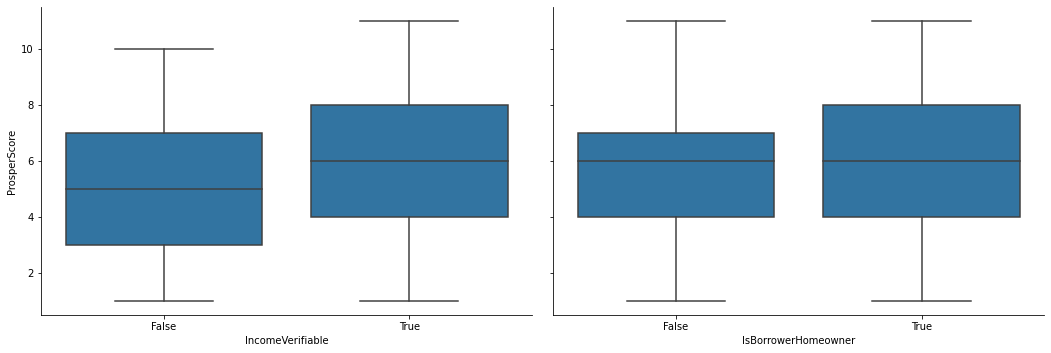

In [24]:
# plotting Prosperscore vs Incomeveriable and isborrowerhomeowner

plt.rcParams["figure.figsize"] = (10,5)
g = sb.PairGrid(data = df_samp, y_vars = ['ProsperScore'], x_vars = ['IncomeVerifiable', 'IsBorrowerHomeowner'], height = 5, aspect = 1.5);
g.map(boxgrid);
plt.show();

As expeced, people who have a verifiable source of income have a higher prosper score than those without a verifiable source of income. Hence, Incomeverifiable is a strong determinant of the prosper score.

I expected that people who own houses should have a higher prosper score. But surprisingly, the score is thesame for those who own houses and those who dont own houses. 

Up next, Prosper Score Vs Occupation

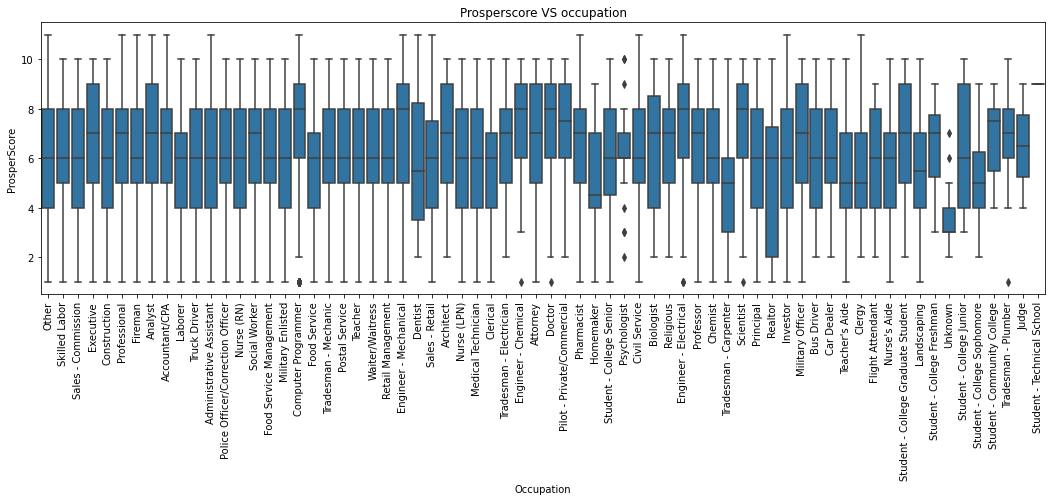

In [285]:
#Prosperscore against occupation
plt.figure(figsize = [18, 5])
sb.boxplot(data=df, x='Occupation', y='ProsperScore', color=base_color)
plt.title('Prosperscore VS occupation')
plt.xticks(rotation=90);
plt.show;

Occupation variable is a strong determinant of the prosper score

From the graph above, Mechnical Engineers, Analyst, Electrical Engineers, Excecutives, Pilots, Biologists are some of the few professions which high prosper score. While on the other occupations like homemakers, postal service, sales, teacher aid are amongs the few occupations with low score. This is properbly as a result of low salary earnings. 

Hence Occupation has a role to play when determining the propser score. 

Next, Prosper Score over the years

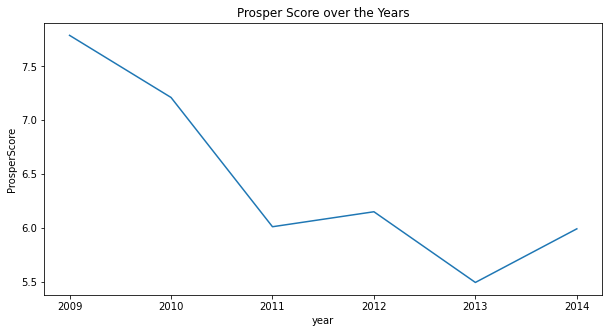

In [25]:
# Prosperscore over the years
sb.lineplot(data=df, x='year', y='ProsperScore', ci=None);
plt.title('Prosper Score over the Years');

Interesting to see a drop in the score value as the years progresses. what could be the reason for the decrease leading to higher interest rates over the years?

# Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

As Expected, prosperscore collerate possivetively with statedmonthly income which means, the higher your monthly income, the higher your prosper score , the higher your laon amount and the lesser the interest rate to be paid.

Prosperscore collerates negatuvely with debttoincomeratio. which means, the more debts you have to pay with your income, the lesser your prosper score and ofcourse, the lesser the amount of loan that can be given to you.

s expected, High and middle income earners have a higher prosper score than lower class income earners.
Full time workers, people who are employed, part time workers do have a higher score comapare to sel-employed and unemployed works. As expected, if your employed, you have a higher chance of paying your loan hence higher score.

People with verifiable source of income have a higher prosper score than those without a verifiable source of income.

Mechnical Engineers, Analyst, Electrical Engineers, Excecutives, Pilots, Biologists are some of the few professions which high prosper score. While on the other occupations like homemakers, postal service, sales, teacher aid are amongs the few occupations with low score. This is properbly as a result of low salary earnings.

# Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

supriseingly, the prosper scores for short term, middle and long term loans are thesame.

Shcokingly, the score value is thesame for those who own houses and those who dont own houses.

Surprisingly, the graph on prosperscore and isborrowehouseowner above shows that weather you own a house or not, your score is thesame. Hence this feature is not considered when assiging these scores to borrowers.

Its surpring to see a drop in the score value as the years progresses. what could be the reason for the decrease leading to higher interest rates over the years?



# Multivariate Exploration

What is the relationship between prosperscore, income over the years?

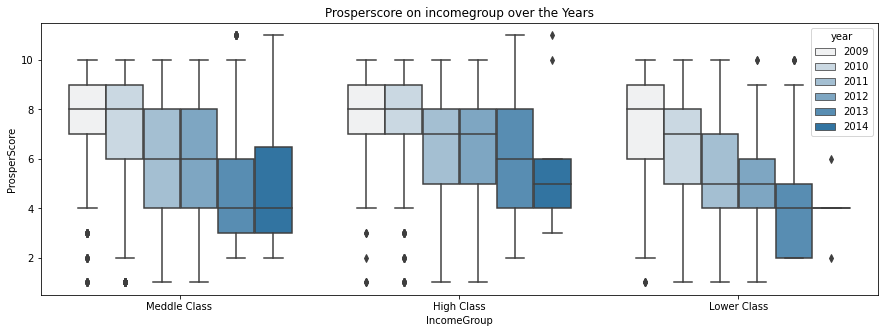

In [288]:
#Plotting Prosprscore over the years for income groups
plt.figure(figsize = [15,5])
sb.boxplot(data = df, y = 'ProsperScore', x = 'IncomeVerifiable',hue = 'year' ,color = base_color);
plt.title('Prosperscore on incomegroup over the Years');

Interesting to see a general of the prosperscore for all income groups with a drop after evry two years averagely for middle and high income earners and a steady yearly drop for lower class. What could be the reason for this steady drop?

In [28]:
df.year.value_counts()

2013    35413
2012    19556
2011    11442
2014    10734
2010     5530
2009     2178
Name: year, dtype: int64

Next, Incomegroup, Prosperscore and Term of Loan

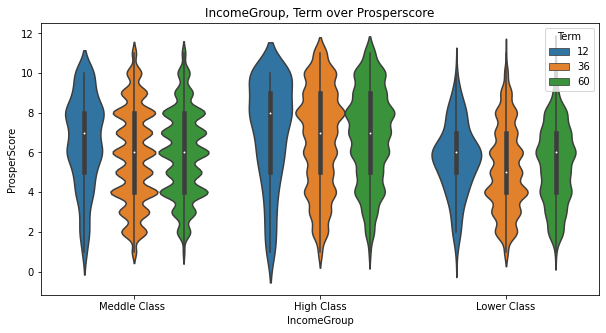

In [38]:
#plotting Incomegroup, Term over Prosperscore
sb.violinplot(data=df, x='IncomeGroup', y='ProsperScore', hue='Term');
plt.rcParams["figure.figsize"] = (10,5)
plt.title('IncomeGroup, Term over Prosperscore');


From the graph above, Prosperscore for each income Group is thesame. Hence, Incomegroup and Term are not a determinant of prosperscore.

Next,  Prosperscore, loan category and Term of the loan

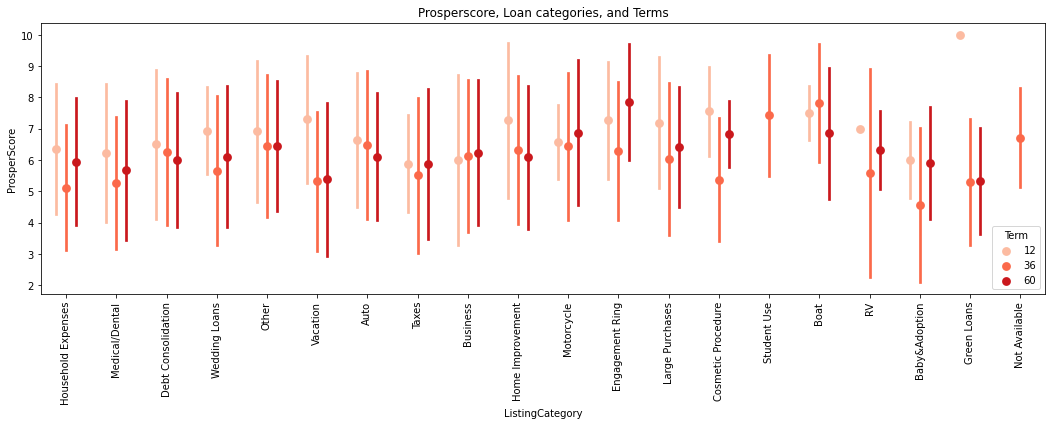

In [191]:
#pointplot  for loan term and category over prosperscore
fig = plt.figure(figsize = [18,5])
ax = sb.pointplot(data = df, x = 'ListingCategory', y = 'ProsperScore', hue = 'Term',
           palette = 'Reds', linestyles = '',dodge = 0.4, ci='sd')
plt.title('Prosperscore, Loan categories, and Terms')
plt.xticks(rotation= 90)
plt.show()

Household Expenses, Mdedical/Dental, Auto, Home improvement, large purchase with short term loans have a higher score comapred to those with middle and long term loans

Baby & Adoption, Engineering Ring, Motorcycle with Long term loans have a higher prosperscore comapred to middle and short term loans.

Green Loans where availbe only for middle and long term loans

Students have only Middle loans of 36 months available for their disposal

Hence, loan category and Term of loan are strong determinants of the prosperscore



 Up next, Employment status with incomeveriable over Prosperscore

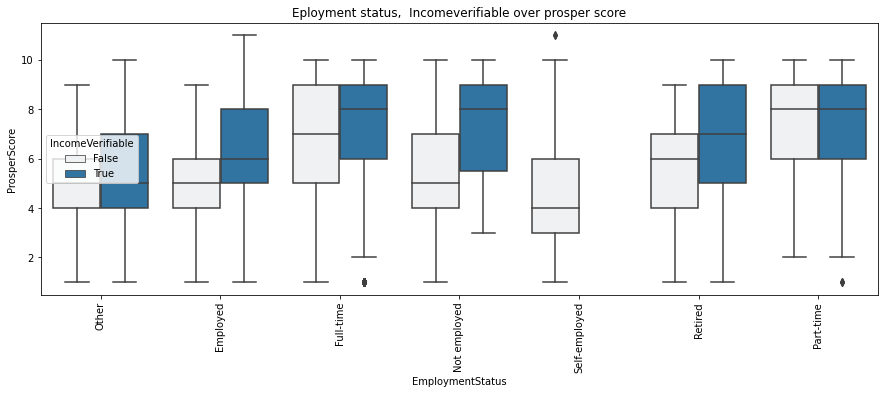

In [290]:
#Plotting with Box plot for better visualization
base_color = sb.color_palette()[0]
plt.figure(figsize = [15,5])
sb.boxplot(data=df, x='EmploymentStatus', y='ProsperScore', hue='IncomeVerifiable' ,color=base_color)
plt.title('Eployment status,  Incomeverifiable over prosper score');
plt.xticks(rotation=90);

There is a strong variation of prosperscore for prople who are Employed and not employed with veriable source of income and those who are employed and not employed without a veriable shource of income. 

Proseperscore is thesame for full time and part time workers weather they have a verifiable source of income or not. Interesting. 


Finally,  Empoyment status, Loan status  over prosper score

In [297]:
# new column which return 1 for good status of payment('Current','Completed','FinalPaymentInProgress') 
# and 0 if there is an issue (defaulted,past due, charged-off payments)

status_good=['Current','Completed','FinalPaymentInProgress']
def cat_Loanstatus(row):
    for i in status_good:
        if i in row:
            return 1
    return 0
df["loanstatus_cat"] = df.LoanStatus.apply(lambda x: cat_Loanstatus(x))

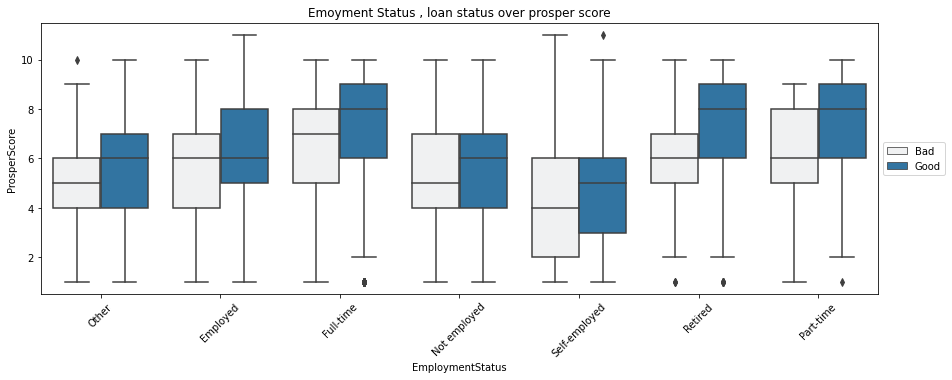

In [298]:
df["loanstatus_cat"].replace({0: "Bad", 1: "Good"}, inplace=True)
plt.figure(figsize=[15, 5])
sb.boxplot(data=df,x='EmploymentStatus',y='ProsperScore',hue='loanstatus_cat',dodge=0.3, color=base_color);
plt.xticks(rotation=45);
plt.title('Emoyment Status , loan status over prosper score');
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) ;

The figure confirms that, all employees with good loan status have higher prosper score and those with bad loan status have a lower prosper score. 

# Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

There were alot of features that strenthen each other such as: 

Household Expenses, Mdedical/Dental, Auto, Home improvement, large purchase with short term loans have a higher score comapred to those with middle and long term loans
Baby & Adoption, Engineering Ring, Motorcycle with Long term loans have a higher prosperscore comapred to middle and short term loans.
Green Loans where availbe only for middle and long term loans

There is a strong variation of prosperscore for prople who are Employed and not employed with veriable source of income and those who are employed and not employed without a veriable shource of income.

Employees with good loan status have higher prosper score and those with bad loan status have a lower prosper score.



# Were there any interesting or surprising interactions between features?

Interesting to see a general of the prosperscore for all income groups with a drop after evry two years averagely for middle and high income earners and a steady yearly drop for lower class. What could be the reason for this steady drop?